<a href="https://colab.research.google.com/github/jaesunkkk/ESAA_2021-2/blob/main/0715.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import pandas as pd
import numpy as np
# Import Linear Regression Models
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, Normalizer # Creates values {0, 1}

from matplotlib.dates import DateFormatter

from statsmodels.base.model import LikelihoodModelResults
from statsmodels.regression.linear_model import OLS

from collections import defaultdict

from pandas.api.types import CategoricalDtype

from datetime import datetime as dt

In [4]:
df=pd.read_csv("/content/drive/MyDrive/인턴_혼공딥/데이터/concrete data final.csv")

In [5]:
df

,cement,flyash,water,slag,age,strength,temp,binder,cement.1,flyash.1,water.1,slag.1,age.1,temp.1,strength.1,time
0,160.7,127.4,162.1,0.0,28.0,27.41,20.0,288.1,55.78,44.22,56.27,0.0,28.0,20.0,27.41,0
1,212.1,125.6,184.2,0.0,28.0,21.81,20.0,337.7,62.81,37.19,54.55,0.0,28.0,20.0,21.81,0
2,165.2,161.3,172.4,0.0,28.0,25.20,20.0,326.5,50.60,49.40,52.80,0.0,28.0,20.0,25.20,0
3,181.8,122.8,169.6,0.0,28.0,28.79,20.0,304.6,59.68,40.32,55.68,0.0,28.0,20.0,28.79,0
4,220.8,121.8,146.1,0.0,28.0,31.74,20.0,342.6,64.45,35.55,42.64,0.0,28.0,20.0,31.74,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692,512.0,0.0,154.0,0.0,NaN,NaN,NaN,512.0,NaN,0.00,30.08,0.0,28.0,150.0,72.80,0
693,500.0,0.0,150.0,0.0,NaN,NaN,NaN,500.0,NaN,0.00,30.00,0.0,28.0,23.0,75.50,0
694,350.0,150.0,150.0,0.0,NaN,NaN,NaN,500.0,NaN,30.00,30.00,0.0,28.0,100.0,73.70,0
695,475.0,0.0,150.0,0.0,NaN,NaN,NaN,475.0,NaN,0.00,31.58,0.0,28.0,200.0,73.40,0


In [29]:
data=df[['cement','flyash.1','water.1','slag.1','temp.1','strength.1','time']]

In [30]:
data

,cement,flyash.1,water.1,slag.1,temp.1,strength.1,time
0,160.7,44.22,56.27,0.0,20.0,27.41,0
1,212.1,37.19,54.55,0.0,20.0,21.81,0
2,165.2,49.40,52.80,0.0,20.0,25.20,0
3,181.8,40.32,55.68,0.0,20.0,28.79,0
4,220.8,35.55,42.64,0.0,20.0,31.74,0
...,...,...,...,...,...,...,...
692,512.0,0.00,30.08,0.0,150.0,72.80,0
693,500.0,0.00,30.00,0.0,23.0,75.50,0
694,350.0,30.00,30.00,0.0,100.0,73.70,0
695,475.0,0.00,31.58,0.0,200.0,73.40,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 697 entries, 0 to 696
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cement      697 non-null    float64
 1   flyash.1    697 non-null    float64
 2   water.1     697 non-null    float64
 3   slag.1      697 non-null    float64
 4   age.1       697 non-null    float64
 5   temp.1      697 non-null    float64
 6   strength.1  697 non-null    float64
 7   time        697 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 43.7 KB


In [9]:
data.isin([0]).sum()

cement          0
flyash.1      313
water.1         0
slag.1        401
age.1           0
temp.1          0
strength.1      0
time          667
dtype: int64

In [10]:
for i in df.columns:
    print(i, df[i].nunique())

cement 322
flyash 183
water 228
slag 190
age 1
strength 425
temp 1
binder 347
cement.1 264
flyash.1 207
water.1 395
slag.1 161
age.1 1
temp.1 18
strength.1 573
time 3


     count
0        2
1        2
2        2
3        2
4        2
..     ...
692      3
693      3
694      2
695      3
696      3

[697 rows x 1 columns]


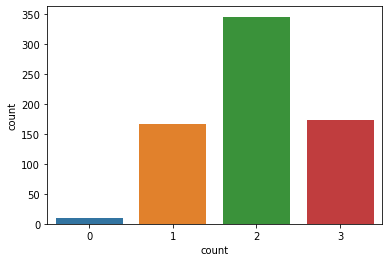

In [11]:
# Count and plot the number zeros by row
temp = pd.DataFrame((data == 0).astype(int).sum(axis=1))
temp.rename(columns={0:'count'}, inplace=True)
print(temp)
sns.countplot(x='count', data=temp)

##EDA

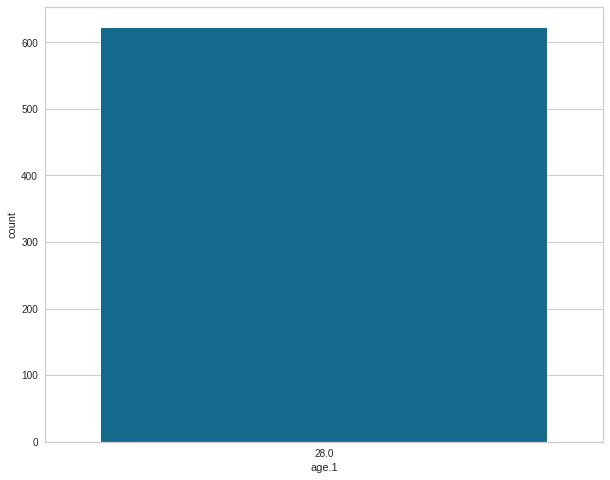

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='age.1', data=data)

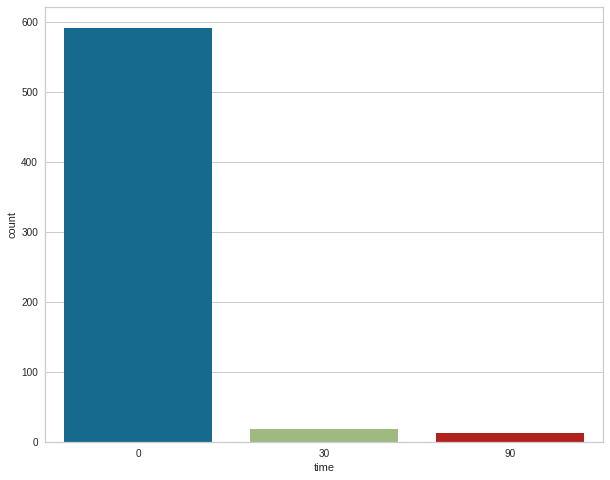

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='time', data=data)

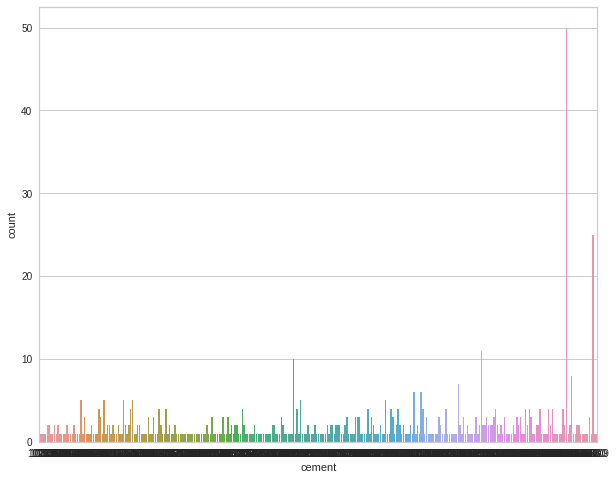

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='cement', data=data)

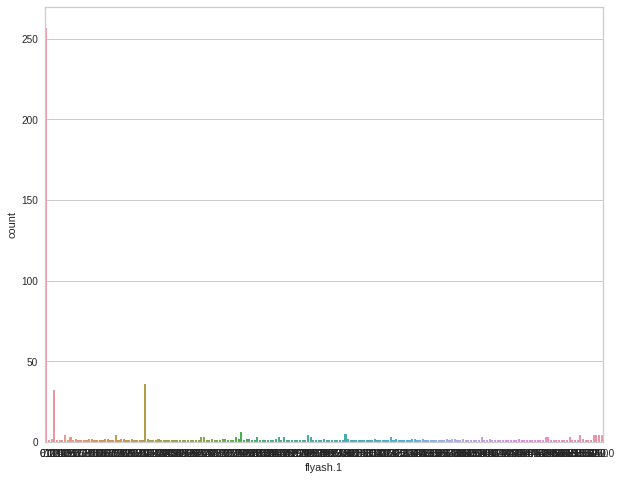

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='flyash.1', data=df)

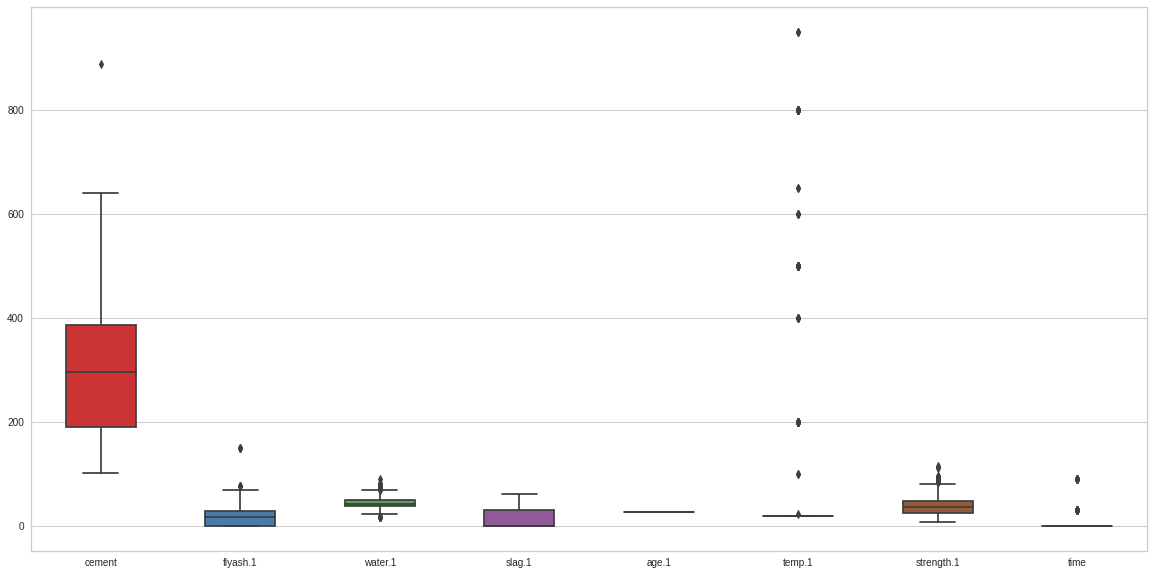

In [ ]:
plt.figure(figsize=(20,10)) 
sns.boxplot(data=data, orient="v", palette="Set1", whis=1.5, width=0.5) 

outlier 제거 코드

In [ ]:
outlier_columns = ['slag.1', 'water.1', 'strength.1', 'cement.1']
for f in outlier_columns:
    q3 = df[f].quantile(q = 0.75)
    q2 = df[f].quantile(q = 0.25)
    IRQ = q3 - q2
    upper_bound = q3 + IRQ * 1.5
    arr = df[f].to_numpy()
    print('\n', f, ' outliers include: \n')
    for i in range(len(arr)):
        if (arr[i] > upper_bound):
            print(f, i, arr[i])        

heatmap

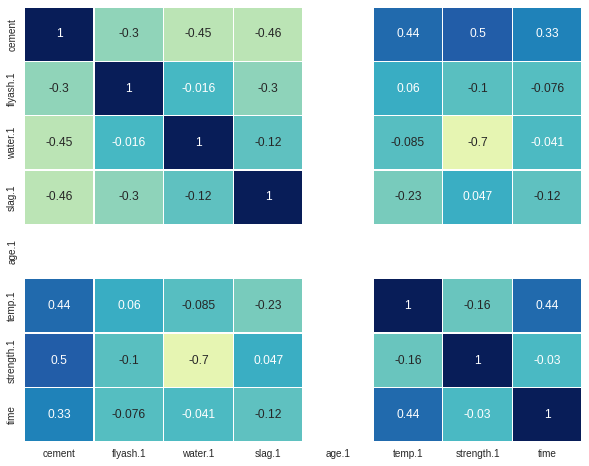

In [ ]:
plt.figure(figsize=(10,8))

sns.heatmap(data.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

##pycaret

In [12]:
!pip install pycaret 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
!pip install Jinja2==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: Jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [14]:
from pycaret.regression import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [15]:
reg = setup(data, 
            preprocess = False,
            train_size = 0.8,  
            target = 'strength.1', 
            silent = True, 
            use_gpu = False, 
            fold_shuffle = True,
            session_id=2022
            )

,Description,Value
0,session_id,2022
1,Target,strength.1
2,Original Data,"(697, 8)"
3,Missing Values,False
4,Numeric Features,6
5,Categorical Features,1
6,Transformed Train Set,"(557, 7)"
7,Transformed Test Set,"(140, 7)"
8,Shuffle Train-Test,True
9,Stratify Train-Test,False


In [16]:
top5 = compare_models(n_select = 5, sort = 'R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,6.4707,94.9945,9.5650,0.7641,0.2348,0.1940,0.068
et,Extra Trees Regressor,5.5525,94.0449,9.4972,0.7632,0.2322,0.1717,0.406
rf,Random Forest Regressor,5.9970,97.7633,9.6134,0.7520,0.2396,0.1875,0.467
ada,AdaBoost Regressor,9.5340,143.4991,11.8934,0.6464,0.3312,0.3296,0.102
dt,Decision Tree Regressor,6.7746,153.7101,12.0494,0.6034,0.2759,0.1962,0.015
lr,Linear Regression,9.1410,159.0779,12.5478,0.6030,0.3582,0.3057,0.516
ridge,Ridge Regression,9.1410,159.0778,12.5478,0.6030,0.3581,0.3057,0.031
lar,Least Angle Regression,9.1410,159.0779,12.5478,0.6030,0.3582,0.3057,0.032
en,Elastic Net,9.1352,159.0796,12.5493,0.6029,0.3578,0.3056,0.031
lasso,Lasso Regression,9.1352,159.1037,12.5506,0.6028,0.3582,0.3057,0.026


##linear model

In [ ]:
# independent variables
x = data.drop(['strength.1','age.1'],axis=1)
# dependent variables
y = data['strength.1']

In [ ]:
# importing train_test_split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(xtrain)
xtrain_scl = Fit.transform(xtrain)
xtest_scl = Fit.transform(xtest)

In [ ]:
# import linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=LinearRegression()
fit=lr.fit(xtrain_scl,ytrain)
score = lr.score(xtest_scl,ytest)
print('predcted score is : {}'.format(score))
print('..................................')
y_predict = lr.predict(xtest_scl)
print('mean_sqrd_error is ==',mean_squared_error(ytest,y_predict))
rms = np.sqrt(mean_squared_error(ytest,y_predict)) 
print('root mean squared error is == {}'.format(rms))

predcted score is : 0.7084901612119434
..................................
mean_sqrd_error is == 91.04963324895195
root mean squared error is == 9.541993148653585


In [ ]:
import matplotlib.pyplot as plt

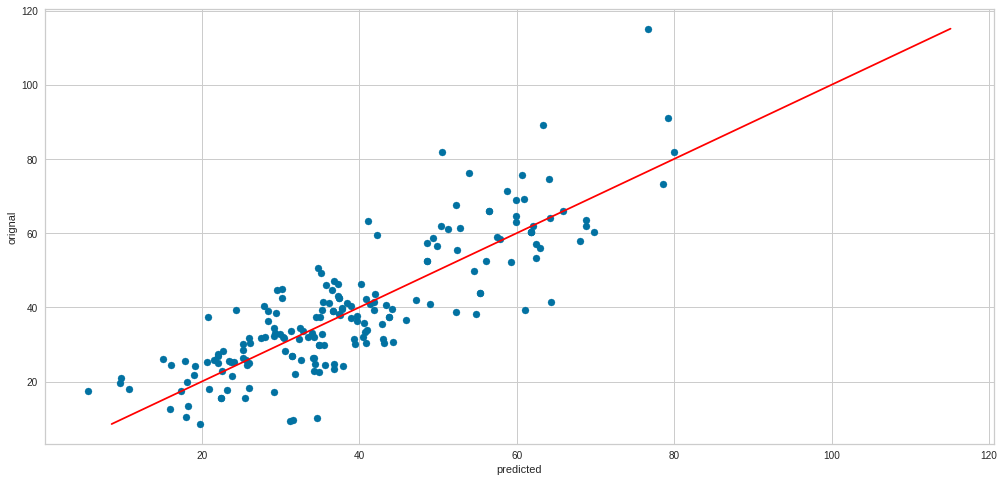

In [ ]:
plt.figure(figsize=[17,8])
plt.scatter(y_predict,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## Gradient Boosting Regressor

In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 200,learning_rate = 0.3, reg_lambda = 5, gamma = 3)
model.fit(xtrain_scl,ytrain,early_stopping_rounds = 10, eval_set = [(xtest_scl, ytest)])
ypred=model.predict(xtest_scl)

[00:54:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:32.0236
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:24.0511
[2]	validation_0-rmse:18.8264
[3]	validation_0-rmse:15.0065
[4]	validation_0-rmse:12.6843
[5]	validation_0-rmse:11.3023
[6]	validation_0-rmse:10.3759
[7]	validation_0-rmse:9.84161
[8]	validation_0-rmse:9.32709
[9]	validation_0-rmse:9.05174
[10]	validation_0-rmse:8.88532
[11]	validation_0-rmse:8.67495
[12]	validation_0-rmse:8.59793
[13]	validation_0-rmse:8.43917
[14]	validation_0-rmse:8.35469
[15]	validation_0-rmse:8.32609
[16]	validation_0-rmse:8.2755
[17]	validation_0-rmse:8.11486
[18]	validation_0-rmse:8.00142
[19]	validation_0-rmse:7.95796
[20]	validation_0-rmse:7.93716
[21]	validation_0-rmse:7.91401
[22]	validation_0-rmse:7.89722
[23]	validation_0-rmse:7.82117
[24]	validation_0-rmse:7.76822
[25]	validation_0-rmse:7.74026
[26]	validati

In [ ]:
score = model.score(xtest_scl,ytest)
print(score)

0.8262286976768133


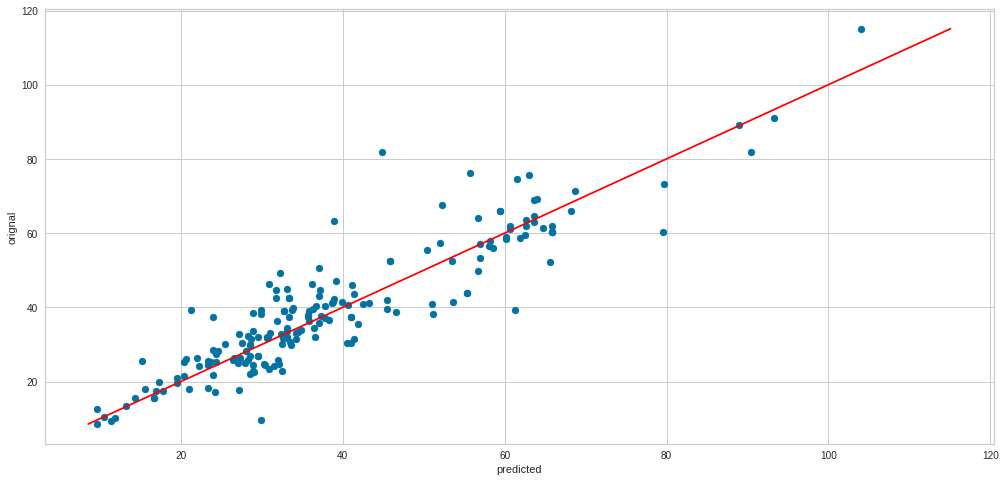

In [ ]:
plt.figure(figsize=[17,8])
plt.scatter(ypred,ytest)
plt.plot([ytest.min(), ytest.max()], [ytest.min(), ytest.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

# 여기서부터!

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['cement','flyash.1','water.1','slag.1','temp.1','strength.1','time'] 
df_coded = pd.DataFrame(scaler.fit_transform(data), columns=cols_to_scale)
df_coded

,cement,flyash.1,water.1,slag.1,temp.1,strength.1,time
0,0.074597,0.800362,0.531528,0.0,0.000000,0.186907,0.0
1,0.139916,0.673122,0.507639,0.0,0.000000,0.144028,0.0
2,0.080315,0.894118,0.483333,0.0,0.000000,0.169985,0.0
3,0.101411,0.729774,0.523333,0.0,0.000000,0.197473,0.0
4,0.150972,0.643439,0.342222,0.0,0.000000,0.220061,0.0
...,...,...,...,...,...,...,...
692,0.521032,0.000000,0.167778,0.0,0.132653,0.534456,0.0
693,0.505782,0.000000,0.166667,0.0,0.003061,0.555130,0.0
694,0.315161,0.542986,0.166667,0.0,0.081633,0.541348,0.0
695,0.474012,0.000000,0.188611,0.0,0.183673,0.539051,0.0


In [28]:
# scaler 변경했을 때 
from sklearn.preprocessing import StandardScaler
df_coded=data
scaler = StandardScaler()
cols_to_scale = ['cement','flyash.1','water.1','slag.1','age.1','temp.1','strength.1','time'] 
df_coded = pd.DataFrame(scaler.fit_transform(data), columns=cols_to_scale)
df_coded

,cement,flyash.1,water.1,slag.1,age.1,temp.1,strength.1,time
0,-1.215699,1.829507,1.024982,-0.712938,0.0,-0.424347,-0.657374,-0.185321
1,-0.828363,1.390032,0.877258,-0.712938,0.0,-0.424347,-0.939930,-0.185321
2,-1.181788,2.153331,0.726958,-0.712938,0.0,-0.424347,-0.768883,-0.185321
3,-1.056695,1.585702,0.974309,-0.712938,0.0,-0.424347,-0.587744,-0.185321
4,-0.762802,1.287509,-0.145641,-0.712938,0.0,-0.424347,-0.438898,-0.185321
...,...,...,...,...,...,...,...,...
692,1.431600,-0.934872,-1.224366,-0.712938,0.0,0.197169,1.632846,-0.185321
693,1.341171,-0.934872,-1.231237,-0.712938,0.0,-0.410005,1.769078,-0.185321
694,0.210813,0.940555,-1.231237,-0.712938,0.0,-0.041876,1.678256,-0.185321
695,1.152778,-0.934872,-1.095538,-0.712938,0.0,0.436214,1.663119,-0.185321


In [33]:
y = pd.DataFrame(df_coded['strength.1'])
X = df_coded.drop(labels=['strength.1'], axis=1)

## train validate test 조정
## data balance 조정

In [34]:
# Create train (60%), va;idate (20%), and test (20%) datasets
X_train, X_validate, X_test = np.split(X.sample(frac=1, random_state=8), [int(.6*len(df)), int(.8*len(df))])
y_train, y_validate, y_test = np.split(y.sample(frac=1, random_state=8), [int(.6*len(df)), int(.8*len(df))])

In [16]:
results = pd.DataFrame(columns=['Gradient Boosting', 'Extratrees','RandomForest'], index=['train', 'validate', 'tune', 'test'])
results 

,Gradient Boosting,Extratrees,RandomForest
train,NaN,NaN,NaN
validate,NaN,NaN,NaN
tune,NaN,NaN,NaN
test,NaN,NaN,NaN


##릿지

In [17]:
# Ridge Linear Regression Model
rlm = Ridge()
rlm.fit(X_train, y_train)
print("Ridge R-Squared on train dataset = {}".format(rlm.score(X_train,y_train)))
results.iloc[0,0] = rlm.score(X_train,y_train)

rlm.fit(X_validate,y_validate)   
print("Ridge  R-Squaredon validate dataset = {}".format(rlm.score(X_validate,y_validate)))
results.iloc[1,0] = rlm.score(X_validate,y_validate)

Ridge R-Squared on train dataset = 0.6349274034772577
Ridge  R-Squaredon validate dataset = 0.6559256584730644


##결정트리

In [29]:
#  Decision Tree Regressor
dtm = DecisionTreeRegressor(max_depth=4, min_samples_split=5, max_leaf_nodes=10, random_state=8)

dtm.fit(X_train,y_train)
print("DT R-Squared on train dataset = {}".format(dtm.score(X_train,y_train)))
results.iloc[0,1] = dtm.score(X_train,y_train)

dtm.fit(X_validate,y_validate)   
print("DT R-Squaredon validate dataset = {}".format(dtm.score(X_validate, y_validate)))
results.iloc[1,1] = dtm.score(X_validate,y_validate)

DT R-Squared on train dataset = 0.7203462602467001
DT R-Squaredon validate dataset = 0.7637909652564356


In [32]:
#파라미터 튜닝
dtm_parms = {"criterion": ["mse", "mae"], "min_samples_split": [5, 10, 20, 40], "max_depth": [2, 4, 6, 8, 10, 12],
              "min_samples_leaf": [5, 10, 20, 40, 100], "max_leaf_nodes": [5,10, 20, 100]}
              
grid_cv_dtm = GridSearchCV(dtm, dtm_parms, cv=5)
 
grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=4, max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=8, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'max_leaf_nodes': [5, 10, 20, 100],
                         'min_sam

In [33]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.6920461628086573
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 100, 'min_samples_leaf': 5, 'min_samples_split': 5}


In [34]:
# Test dataset evaluation

best_dtm_model = grid_cv_dtm.best_estimator_

y_pred = best_dtm_model.predict(X_test)
arr = np.array(y_test)
residuals = arr.flatten() - y_pred


r2_score = best_dtm_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

results.iloc[3,1] = r2_score

R-squared:0.654
MSE: 0.01


##간단확인

In [24]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
## XGBR
import xgboost
xgbr=xgboost.XGBRegressor()
xgbr.fit(X_train,y_train)
xgbr.score(X_train,y_train)
y_pred_xgbtr=xgbr.predict(X_train)
y_pred_xgbte=xgbr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_xgbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_xgbte))

In [19]:
## GBR
from sklearn.ensemble import GradientBoostingRegressor
gb=GradientBoostingRegressor()
gb.fit(X_train,y_train)
gb.score(X_train,y_train)
y_pred_gbtr=gb.predict(X_train)
y_pred_gbte=gb.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_gbtr))
print('Test R2 score: ',r2_score(y_test,y_pred_gbte))

Train R2 score:  0.8969877440511854
Test R2 score:  0.7890801114100282


/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
##RF
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
rfr.score(X_train,y_train)
y_pred_rfrtr=rfr.predict(X_train)
y_pred_rfrte=rfr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_rfrtr))
print('Test R2 score: ',r2_score(y_test,y_pred_rfrte))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Train R2 score:  0.9556160432509728
Test R2 score:  0.7710584558691052


In [23]:
##Extratrees
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(X_train,y_train)
etr.score(X_train,y_train)
y_pred_etr=etr.predict(X_train)
y_pred_etr=etr.predict(X_test)
print('Train R2 score: ',r2_score(y_train,y_pred_etr))
print('Test R2 score: ',r2_score(y_test,y_pred_etr))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ValueError: ignored

##GBR

In [23]:
#  Gradient Boosting Regressor 
gbr = GradientBoostingRegressor(n_estimators=600, 
    max_depth=5, 
    learning_rate=0.01, 
    min_samples_split=3)

gbr.fit(X_train, y_train)
print("R-Squared on train dataset={}".format(gbr.score(X_train,y_train)))
results.iloc[0,2] = gbr.score(X_train,y_train)

gbr.fit(X_validate,y_validate)   
print("R-Squaredon validate dataset={}".format(gbr.score(X_validate,y_validate)))
results.iloc[1,2] = gbr.score(X_validate,y_validate)

R-Squared on train dataset=0.9489620089477496
R-Squaredon validate dataset=0.9953010711777865


In [38]:
gbr.fit(X_test,y_test)   
print("R-Squared on test dataset={}".format(gbr.score(X_test, y_test)))

R-Squared on train dataset=0.9489620089477496
R-Squared on test dataset=0.9935557140795481


In [25]:
import matplotlib.pyplot as plt

MSE: 0.00


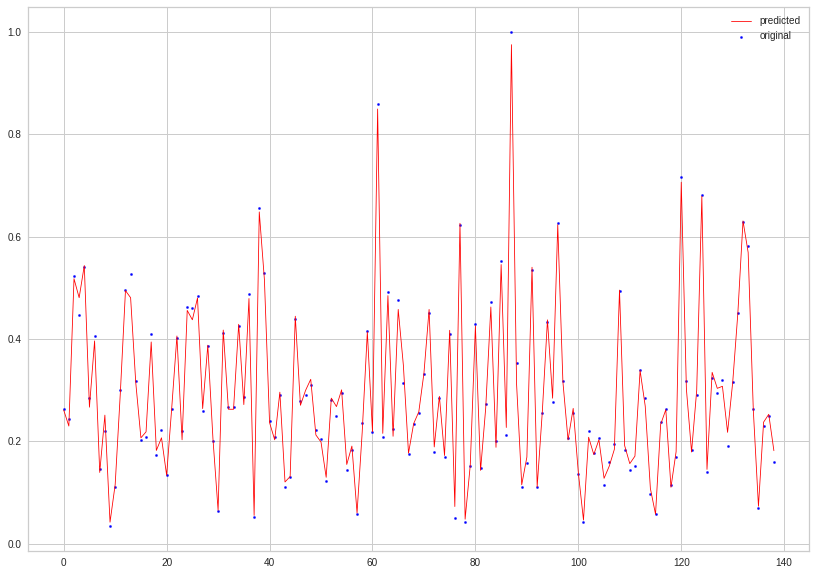

In [26]:
ypred = gbr.predict(X_validate)

mse = mean_squared_error(y_validate,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(y_validate))

plt.figure(figsize=(14,10)) 
plt.scatter(x_ax, y_validate, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [36]:
gbr_parms = {'n_estimators':[500, 600, 700],            
            'max_features':[1, 3, 5, 8], 'criterion':['friedman_mse',  'mae']}

grid_cv_gbr = GridSearchCV(gbr, gbr_parms, cv=5, n_jobs=4)

grid_cv_gbr.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.01,
                                                 loss='ls', max_depth=5,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=3,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=600,
                                                 n_iter_no_change=None,
                

In [37]:
print("R-Squared: {}".format(grid_cv_gbr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_gbr.best_params_))
results.iloc[2,2] = grid_cv_gbr.best_score_

R-Squared: 0.7745070855710463
Best Hyperparameters::
{'criterion': 'friedman_mse', 'max_features': 1, 'n_estimators': 700}


In [39]:
# 테스트데이터셋 성능

best_gbr_model = grid_cv_gbr.best_estimator_

y_pred = best_gbr_model.predict(X_test)
arr = np.array(y_test)
residuals = arr.flatten() - y_pred

r2_score = best_gbr_model.score(X_test,y_test)
print("R-squared:{:.3f}".format(r2_score))
print("MSE: %.2f" % mean_squared_error(y_test, y_pred))

results.iloc[3,2] = r2_score

R-squared:0.798
MSE: 0.00


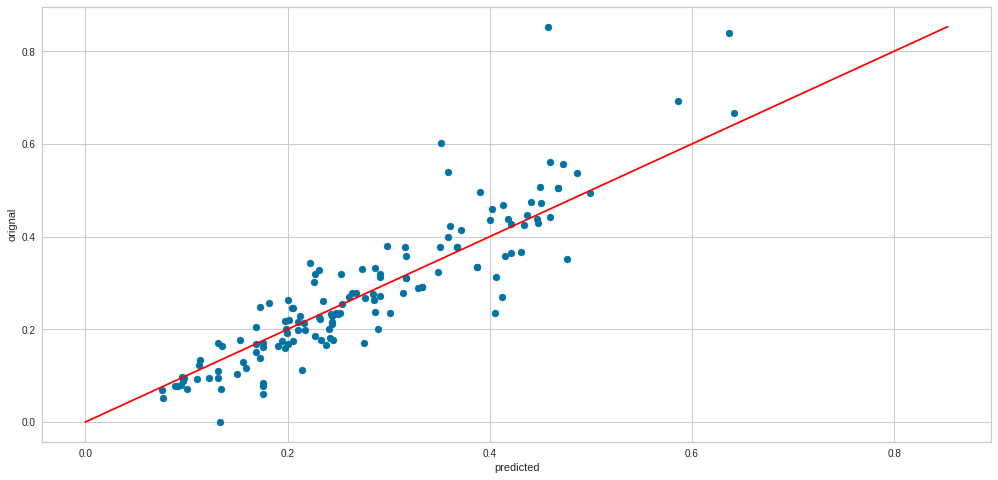

In [40]:
plt.figure(figsize=[17,8])
plt.scatter(y_pred,y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('predicted')
plt.ylabel('orignal')
plt.show()

## Extra trees

## GBR 만 높게나온 이유 분석